#Linear regression with two input variables
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing `BloodPressure` and `BMI`?

In [1]:
from google.colab import files
uploaded = files.upload()

Saving climate_change.csv to climate_change.csv


In [2]:
import pandas as pd
data = pd.read_csv('climate_change.csv', delimiter=',')
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [0]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
# CO2, CH4, Temp
dataset = np.genfromtxt('climate_change.csv', delimiter=",", skip_header = True, usecols=(3, 4, 10)) 

In [4]:
print(dataset.shape)
print('')
print(dataset[0:5])
# print('')
# print(dataset[:, 0:2]) # Get CO2 and CH4
# print('')
# print(dataset[:, 0]) # Get CO2
# print('')
# print(dataset[:, 1]) # Get CH4
# print('')
# print(dataset[:, 2]) # Get Temp

(308, 3)

[[3.45960e+02 1.63859e+03 1.09000e-01]
 [3.45520e+02 1.63371e+03 1.18000e-01]
 [3.44150e+02 1.63322e+03 1.37000e-01]
 [3.42250e+02 1.63135e+03 1.76000e-01]
 [3.40170e+02 1.64840e+03 1.49000e-01]]


In [5]:
import plotly.express as px
import pandas as pd

d = {'CO2': dataset[:, 0], 'CH4': dataset[:, 1], 'Temp': dataset[:, 2]}
df = pd.DataFrame(data=d)

fig = px.scatter_3d(df, x='CO2',  y='CH4', z='Temp',  opacity = 0.4)
fig.show()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 2, activation='linear'))

In [0]:
mean = dataset[:, 0:2].mean(axis=0)
dataset[:, 0:2] -= mean
std = dataset[:, 0:2].std(axis=0)
dataset[:, 0:2] /= std

In [13]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
# CO2 and CH4 <=> Temp
model.fit(dataset[:, 0:2], dataset[:, 2], epochs = 1024, verbose = 1)

Train on 308 samples
Epoch 1/1024
308/308 [==============================] - 0s 177us/sample - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 2/1024
308/308 [==============================] - 0s 46us/sample - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 3/1024
308/308 [==============================] - 0s 50us/sample - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 4/1024
308/308 [==============================] - 0s 56us/sample - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 5/1024
308/308 [==============================] - 0s 49us/sample - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 6/1024
308/308 [==============================] - 0s 54us/sample - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 7/1024
308/308 [==============================] - 0s 55us/sample - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 8/1024
308/308 [==============================] - 0s 43us/sample - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 9/1024
308/308 [==============================] - 0s

In [14]:
print('Model weights (w0, w1, and bias):')
w0 = model.layers[0].get_weights()[0][0]
w1 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(w1)
print(b0)

Model weights (w0, w1, and bias):
[0.1]
[0.03]
[0.26]


What is our model's equation?

In [15]:
np.set_printoptions(precision = 2)
print ('True Validation Data:')
print(dataset[:10, 2])
prediction = model.predict(dataset[:, 0:2])
print ('Prediction:')
print(prediction[0:5].T)

True Validation Data:
[0.11 0.12 0.14 0.18 0.15 0.09 0.23 0.08 0.09 0.01]
Prediction:
[[ 0.03  0.03  0.01 -0.   -0.01]]


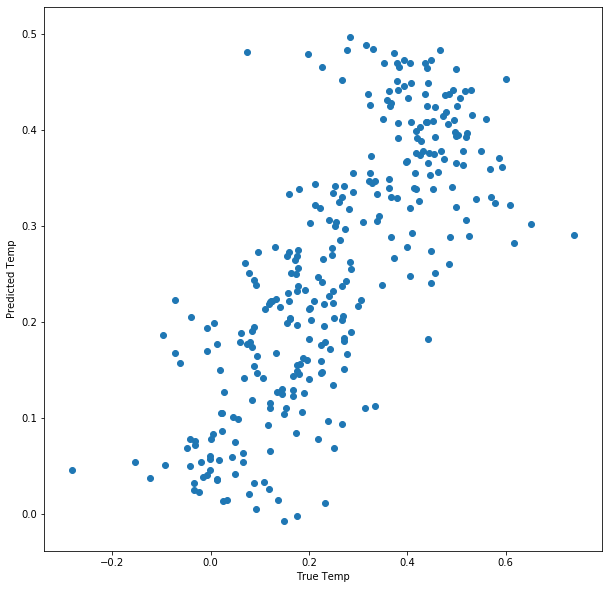

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(dataset[:, 2], prediction)
plt.ylabel('Predicted Temp')
plt.xlabel('True Temp')
plt.show()

Are these predictions reasonable? How did you verify?

In [0]:
# No, prediction is all over the place